# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely atrocious. LHR-OR...
1,✅ Trip Verified | As someone who flies relentl...
2,✅ Trip Verified | Flew with British Airways ...
3,✅ Trip Verified | Straightforward check in T...
4,Not Verified | I am beyond upset and disgusted...


In [5]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
#print(df)
indices_to_drop = df[df['reviews'].str.contains('Not Verified')].index

# Drop those rows
data = df.drop(indices_to_drop)
print(data)




                                              reviews
0   ✅ Trip Verified | Absolutely atrocious. LHR-OR...
1   ✅ Trip Verified | As someone who flies relentl...
2   ✅ Trip Verified |   Flew with British Airways ...
3   ✅ Trip Verified |   Straightforward check in T...
5   ✅ Trip Verified |   I purchased round trip dir...
..                                                ...
93  ✅ Trip Verified |  BA First, it's not even the...
94  ✅ Trip Verified |  The worst business class ex...
97  ✅ Trip Verified |  On the my trip to Mexico Ci...
98  ✅ Trip Verified |  I upgraded at check in to C...
99  ✅ Trip Verified |  I bought a return trip with...

[71 rows x 1 columns]


In [7]:
data['reviews'] = data['reviews'].apply(lambda x: x[17:])
print(data)
data.to_csv("data/BA_reviews.csv")

                                              reviews
0    Absolutely atrocious. LHR-ORD-LHR Round-trip....
1    As someone who flies relentlessly with Britis...
2      Flew with British Airways club Europe on Sa...
3      Straightforward check in T5. New site for c...
5      I purchased round trip direct flight busine...
..                                                ...
93    BA First, it's not even the best business cl...
94    The worst business class experience. Ground ...
97    On the my trip to Mexico City, I had the opp...
98    I upgraded at check in to Club Europe seat 1...
99    I bought a return trip with BA, through Webj...

[71 rows x 1 columns]


In [8]:
chunked_data = []
good = 0
bad = 0
total = 0
x = 0
for chunk in pd.read_csv("data/BA_reviews.csv", chunksize=1):
    # Process each row (chunk) here
    for index, row in chunk.iterrows():
        analysis = TextBlob(str(row[1]))
        sentiment = analysis.sentiment.polarity
        if sentiment > 0:
            good = good + 1
        if sentiment < 0:
            bad = bad + 1

        x=x+1
        
        total = total + sentiment
        chunked_data.append(sentiment)
        #chunked_data.append(row[1])
    average_sentiment = total/x
print(chunked_data)


C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2712690458.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analysis = TextBlob(str(row[1]))
C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2712690458.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analysis = TextBlob(str(row[1]))
C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2712690458.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analysis = TextBlob(str(row[

[-0.08453246753246753, -0.10625, -0.07395833333333335, 0.21305361305361303, 0.08625000000000001, 0.0, -0.06666666666666667, -0.11171874999999999, 0.582037037037037, 0.29675324675324677, -0.012777777777777777, -0.225, 0.05500000000000001, 0.35340909090909095, 0.3333333333333333, 0.008514492753623195, -0.04499999999999997, 0.09720982142857144, 0.013813405797101452, -0.003918650793650812, -0.14338235294117646, -0.4240740740740741, 0.2568627450980392, -0.08870771204104537, 0.05786100803957942, 0.2495, -0.10299999999999997, 0.12591666666666665, -0.09078947368421053, 0.07438852813852816, 0.3055769230769231, -0.05833333333333335, -0.03166666666666666, 0.044583333333333336, 0.22560023310023308, -0.05635964912280702, -0.03214285714285715, -0.23333333333333334, 0.1027777777777778, -0.1222222222222222, -0.05000000000000001, 0.282548309178744, 0.08140681003584231, -0.24722222222222223, 0.07240196078431373, 0.026960784313725488, -0.07949275362318842, -0.15, 0.04000000000000001, -0.00056628056628055

C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2712690458.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analysis = TextBlob(str(row[1]))
C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2712690458.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analysis = TextBlob(str(row[1]))


In [9]:
data['sentiment score'] = chunked_data
print(data)
data.to_csv("data/BA_reviews.csv")

                                              reviews  sentiment score
0    Absolutely atrocious. LHR-ORD-LHR Round-trip....        -0.084532
1    As someone who flies relentlessly with Britis...        -0.106250
2      Flew with British Airways club Europe on Sa...        -0.073958
3      Straightforward check in T5. New site for c...         0.213054
5      I purchased round trip direct flight busine...         0.086250
..                                                ...              ...
93    BA First, it's not even the best business cl...         0.012000
94    The worst business class experience. Ground ...        -0.019097
97    On the my trip to Mexico City, I had the opp...         0.141721
98    I upgraded at check in to Club Europe seat 1...         0.694231
99    I bought a return trip with BA, through Webj...         0.137037

[71 rows x 2 columns]


35 35 0.024679733018114113


Text(0.5, 1.0, 'No. good and bad reviews')

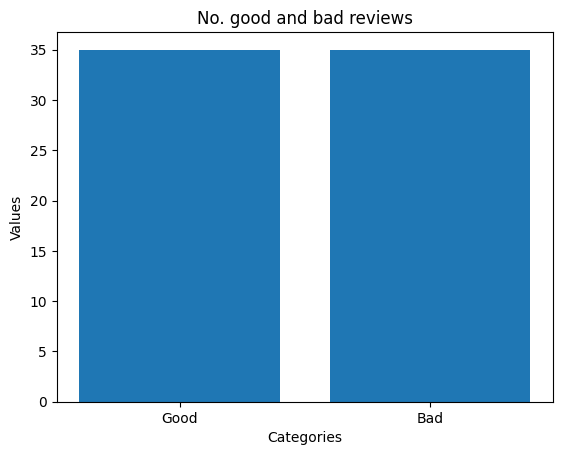

In [10]:
print(good,bad,average_sentiment)

categories = ['Good', 'Bad']
values = [good, bad]
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('No. good and bad reviews')


In [11]:
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Load the data
df = pd.read_csv('data\BA_reviews.csv')

# Preprocess the text data
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # Tokenize and remove punctuation

df['processed_reviews'] = df['reviews'].apply(preprocess)

# Create a dictionary representation of the documents
dictionary = Dictionary(df['processed_reviews'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5)

# Create a corpus: list of bag-of-words
corpus = [dictionary.doc2bow(doc) for doc in df['processed_reviews']]

# Set parameters
num_topics = 5  # Number of topics

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)


<>:10: SyntaxWarning: invalid escape sequence '\B'
<>:10: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Martin\AppData\Local\Temp\ipykernel_11712\2720640021.py:10: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('data\BA_reviews.csv')


Topic: 0 
Words: 0.058*"me" + 0.037*"told" + 0.036*"they" + 0.033*"we" + 0.032*"by" + 0.030*"so" + 0.030*"be" + 0.029*"all" + 0.028*"no" + 0.025*"when"

Topic: 1 
Words: 0.075*"we" + 0.043*"seats" + 0.041*"you" + 0.033*"an" + 0.029*"they" + 0.028*"have" + 0.028*"be" + 0.025*"them" + 0.024*"when" + 0.023*"us"

Topic: 2 
Words: 0.125*"we" + 0.081*"our" + 0.034*"check" + 0.033*"have" + 0.029*"service" + 0.028*"airport" + 0.025*"us" + 0.024*"only" + 0.023*"there" + 0.022*"been"

Topic: 3 
Words: 0.049*"crew" + 0.048*"very" + 0.037*"no" + 0.030*"service" + 0.029*"cabin" + 0.029*"class" + 0.026*"so" + 0.025*"one" + 0.025*"all" + 0.024*"business"

Topic: 4 
Words: 0.101*"luggage" + 0.076*"food" + 0.063*"check" + 0.062*"all" + 0.058*"time" + 0.058*"very" + 0.042*"seats" + 0.038*"good" + 0.036*"hour" + 0.031*"me"



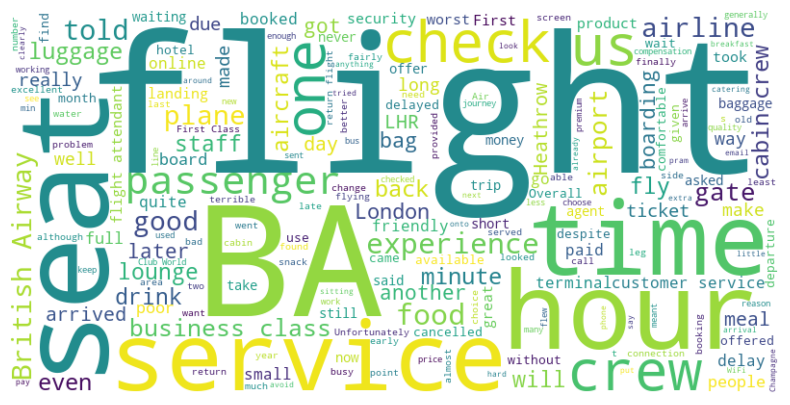

In [12]:
from wordcloud import WordCloud
text = " ".join(review for review in df.reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()